## Find similar wines!
The purpose of this task is to cluster the wines based of 13 following features using kmeans algorithm. The data provided with labels (Type column), so we keep in mind to avoid 'Type' contributing in clustring since we are dealing with unsupervised learning.

0. Type
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

### Scaling
As far as we concern in clustring based on the distance of the points, the distance is sensitive to the unit of measurment. So for those features with higher unit of measurment contribute the most bias the distance to higher values and dominate those with less unit of measurment. So first step that must be taken is scaling the features to have the same unit of measurment.

### visualizing
Since we are dealing with 13 features that is not possible to be plotted on 2D screen. we need to reduce the dimentionallity. Principle Component Anaysis (PCA) is one the most common-used dimension reduction precedure that turn the points in such way that the first components explain the most possible variance of the points. So taking the first two components makes sense to visualize the point.

In [4]:
import clustering_lib
import pandas as pd

In [5]:
label_name = ['Type']
feature_names = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
columns_name = label_name + feature_names
wine_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = columns_name)

In [6]:
wine_df.head()

Type  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0     1    14.23        1.71  2.43               15.6        127   
1     1    13.20        1.78  2.14               11.2        100   
2     1    13.16        2.36  2.67               18.6        101   
3     1    14.37        1.95  2.50               16.8        113   
4     1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

### How many clusters
Finding the right number of clusters is not a easy, but the elbow method is a way to guess the number of clusters based on elbow point that is shown as red dot (3 clusters) in the following plot. 

In [11]:
SSD = list()
for k in range(1,10):
    k_mean_wine = clustering_lib.k_mean(data = wine_df, K = k, features = feature_names)
    results = k_mean_wine.apply()
    SSD.append(results['SSD'][-1])

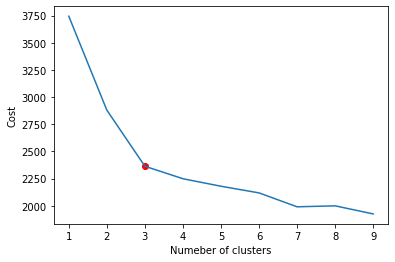

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),SSD)
plt.xlabel('Numeber of clusters')
plt.ylabel('Cost')
plt.scatter(3,SSD[2], color = 'r')

In [7]:
k_mean_wine = clustering_lib.k_mean(data = wine_df, K = 3, features = feature_names)

In [8]:
k_mean_wine.data_df.columns
k_mean_wine.scaled_df.head()

Alcohol_scaled  Malic acid_scaled  Ash_scaled  Alcalinity of ash_scaled  \
0        1.518613          -0.562250    0.232053                 -1.169593   
1        0.246290          -0.499413   -0.827996                 -2.490847   
2        0.196879           0.021231    1.109334                 -0.268738   
3        1.691550          -0.346811    0.487926                 -0.809251   
4        0.295700           0.227694    1.840403                  0.451946   

   Magnesium_scaled  Total phenols_scaled  Flavanoids_scaled  \
0          1.913905              0.808997           1.034819   
1          0.018145              0.568648           0.733629   
2          0.088358              0.808997           1.215533   
3          0.930918              2.491446           1.466525   
4          1.281985              0.808997           0.663351   

   Nonflavanoid phenols_scaled  Proanthocyanins_scaled  \
0                    -0.659563                1.224884   
1                    -0.820719               -0.544721   
2                    -0.498407                2.135968   
3                    -0.981875                1.032155   
4                     0.226796                0.401404   

   Color intensity_scaled  Hue_scaled  OD280/OD315 of diluted wines_scaled  \
0                0.251717    0.362177                             1.847920   
1               -0.293321    0.406051                             1.113449   
2                0.269020    0.318304                             0.788587   
3                1.186068   -0.427544                             1.184071   
4               -0.319276    0.362177                             0.449601   

   Proline_scaled  
0        1.013009  
1        0.965242  
2        1.395148  
3        2.334574  
4       -0.037874

In [8]:
results = k_mean_wine.apply()

<IPython.core.display.Javascript object>


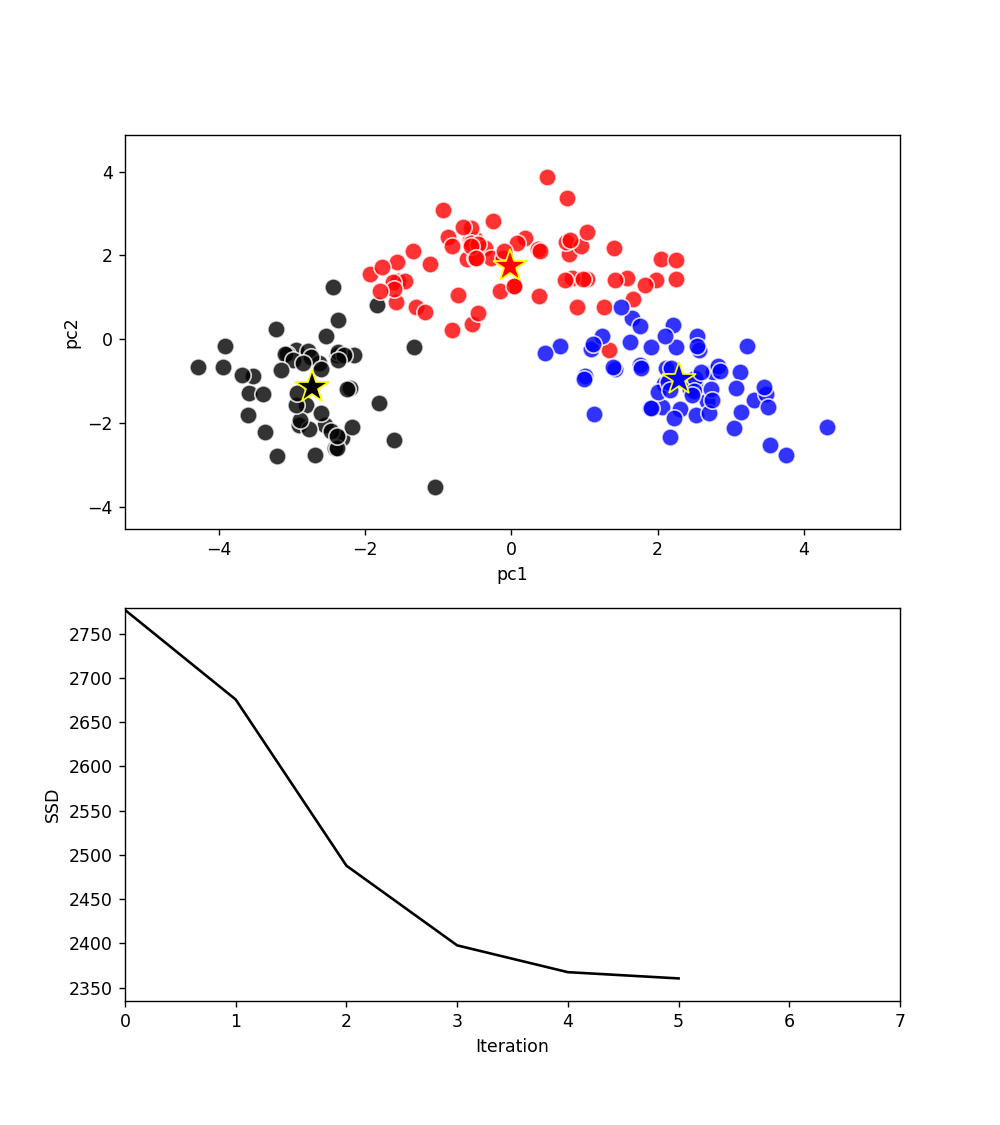

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
ani = clustering_lib.SubplotAnimation(results)

The first plot, made using the first two components of PCA, show us that the points are devided in a good way in k different clusters. There are not overlapping between different clusters.
The second plot show that after 5 iteration the SSD converge, this means that the distance between the centroids at the step 4 and the centroinds at the step 5 is less than a prefixed treshold.

###  Features contribute the most

<IPython.core.display.Javascript object>


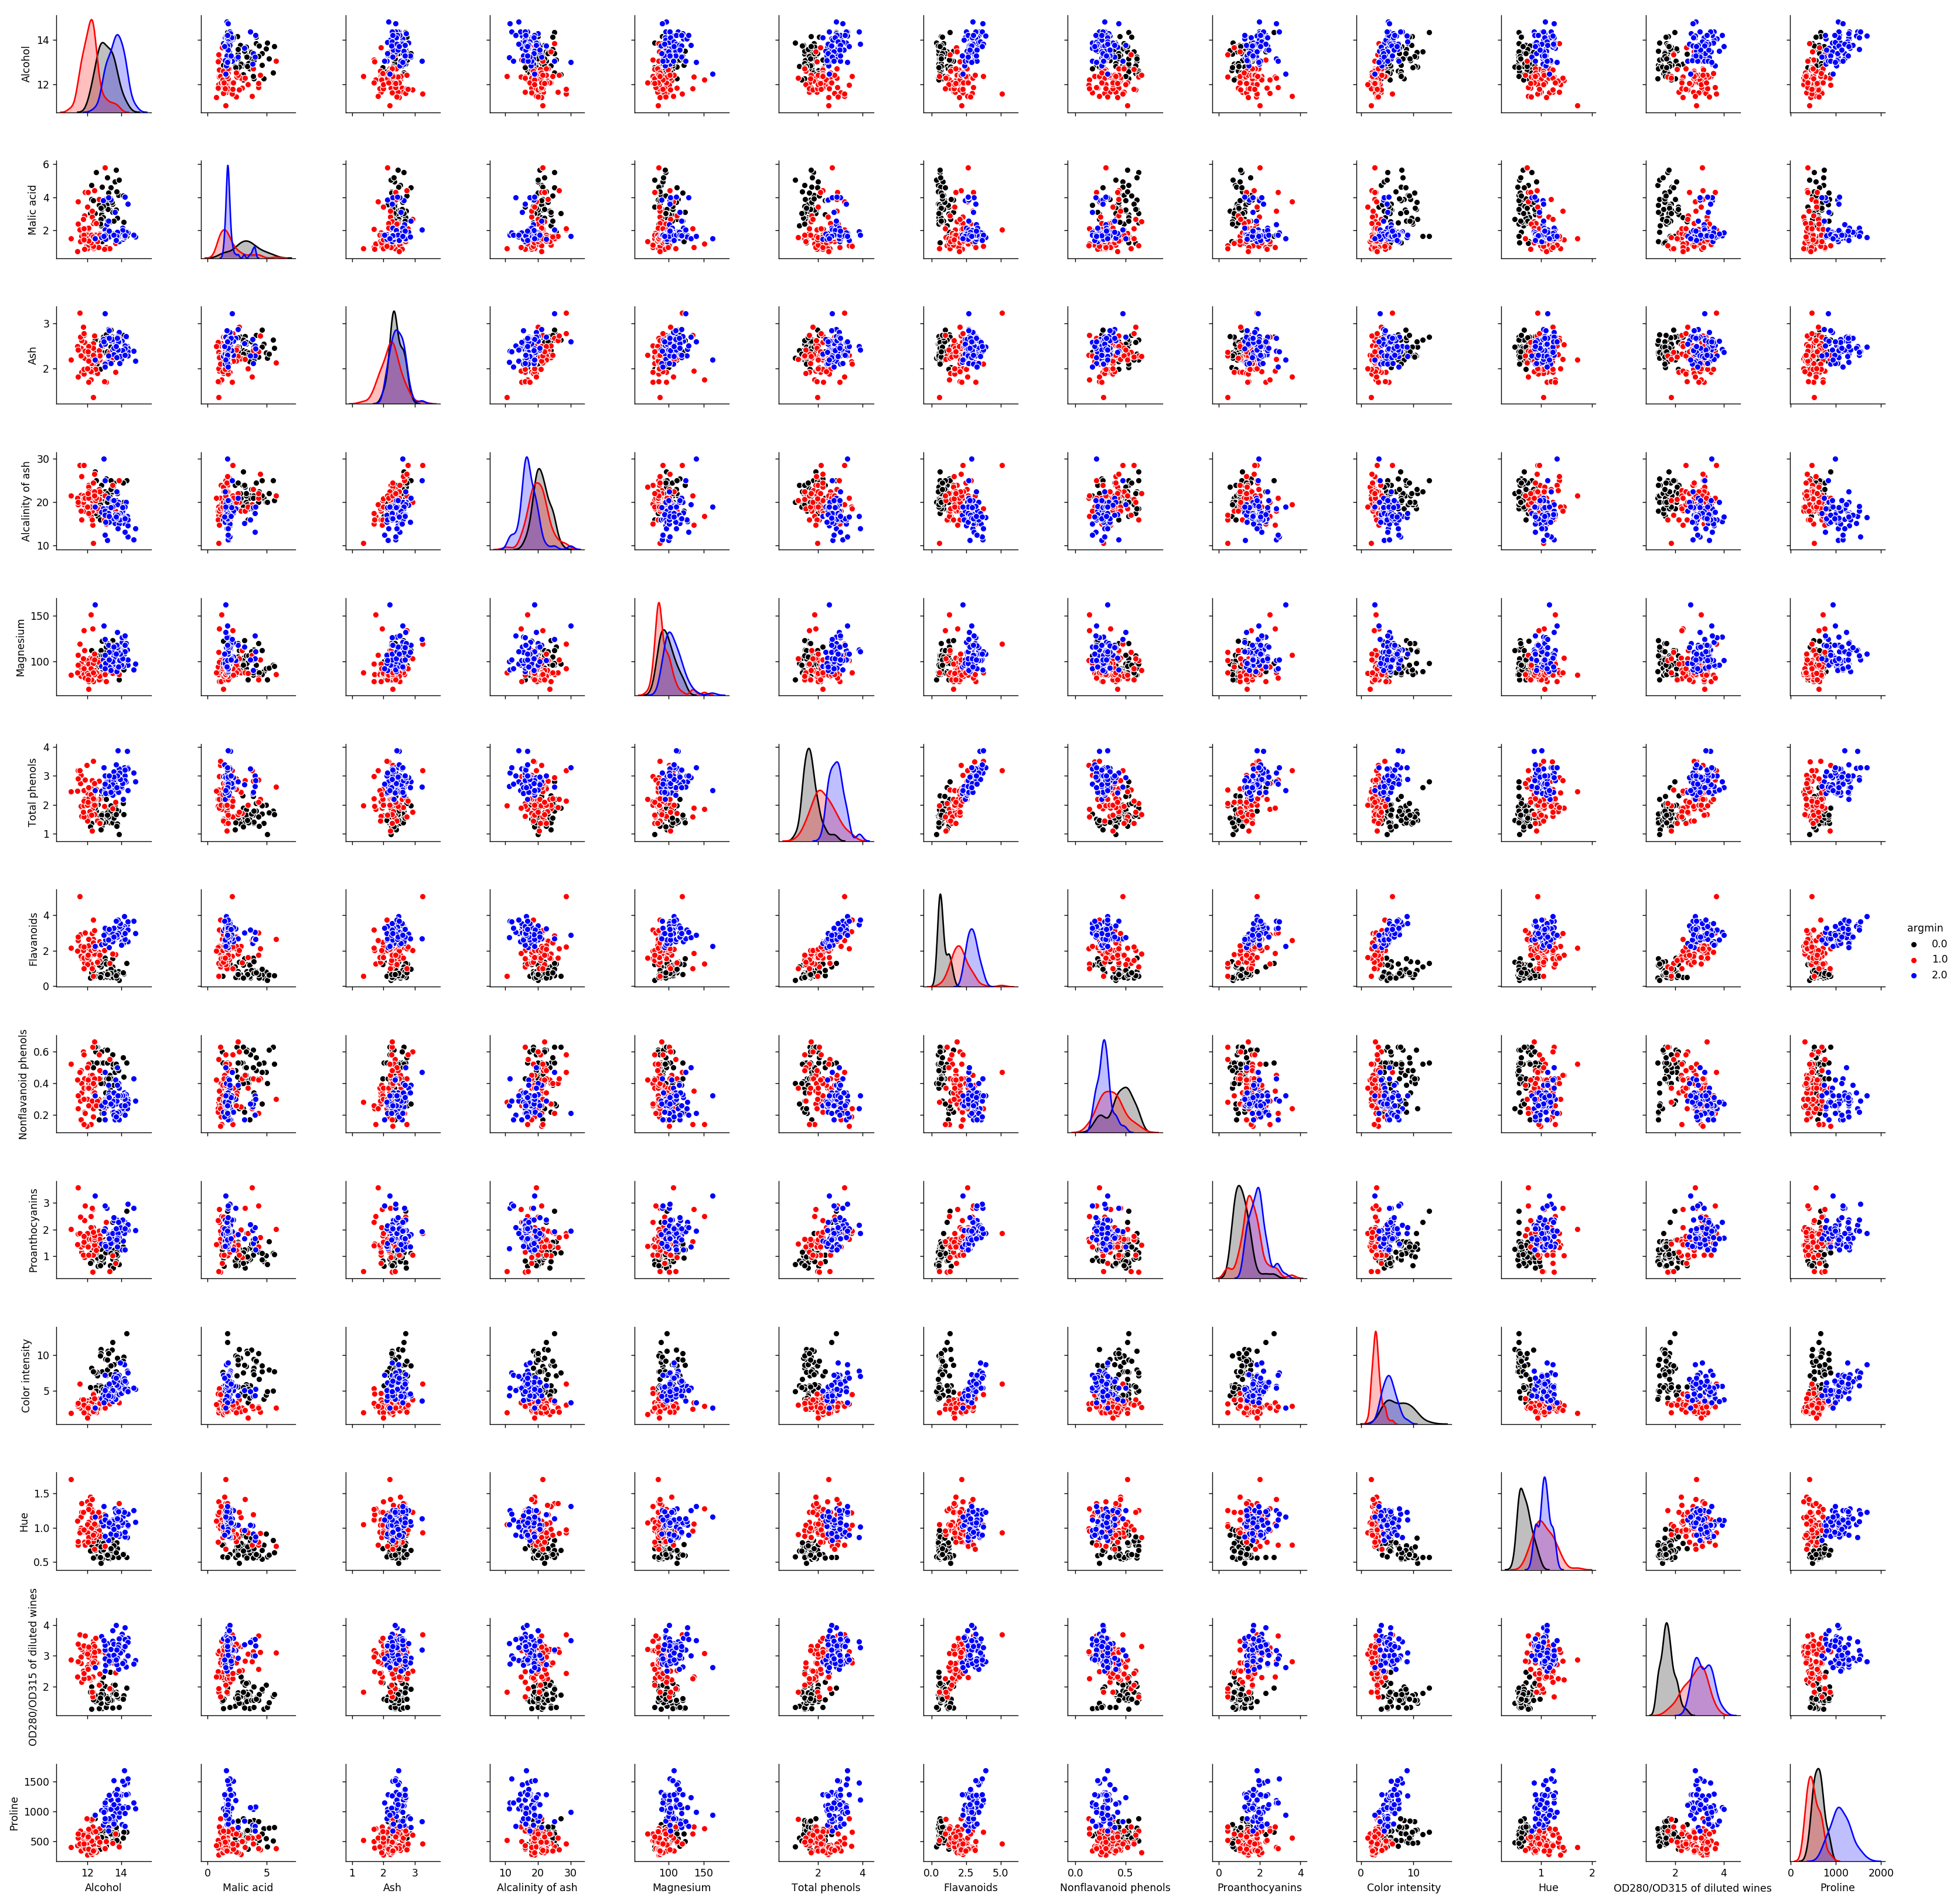

In [11]:
import seaborn as sns
import pandas as pd
sns.pairplot(results['data'][feature_names+["argmin"]], hue="argmin", height=2, vars = feature_names, palette = {0.0:'black',1.0:'red',2.0:'blue'})#,3.0:'green'})
plt.show() 

The previous plots are really usefull to see which features  contribute more to  find the clusters.
If we look at the histograms on the diagonal we can understand if the clusters are able to distinguish the clusters using a given feature.

As we can see in the following plot, if the histogram along a direction is unimodal this means that there is no way with k-means to distinguish the different points using that particular characteristic. only if the distribution of the points is multimodal along one direction, then those features will contribute to the division into clusters.

<img src="clust.png">

Looking at the distributions of 'Magnesium' or 'Ash', we can see how the three different histograms are one above the other, this means that these characteristics are not significant for  distinguishing the clusters. 

On the contrary some features like 'Alcohol' or 'Flavanoids' have very distinct histograms, this means that these features contribute a lot to the formation of clusters.

From the file wine.names we can read that the wines all come from the same region in Italy but there are three different cultivars.
The quantity of flavonoids present in the wine, as can be read in this [link](http://lem.ch.unito.it/didattica/infochimica/2007_Polifenoli_Vino/flavo.html), are greater in grapes ripened in soils with a high exposure to the sun and in the respective wines.
So all the more so these Flavonoids are important in the division into clusters.

## K-means can go wrong!
K-means picks initial centroid randomly from data points that make it likely to get trapped in a local minimum. For example for $K= 3$ if in the initialization step, K-means picks the centroids that are close to each other, it is more likely to reach a local minimum rather than global. The probability of finding a local minimum decreases using an algorithm like K-means++, however, it works better than K-means but it can not guarantee global minimum.

### K-median
K-median is a problem in operation research science that is about allocating the points to the nearest median. K-median is similar to clustering problem with cost function as a summation of squared distance. K-median in terms of a mathematical formulation is of the mixed-integer linear programming (MILP) if the solution space narrowed down to the points space.

There exists an algorithm named branch & bound (B&B) that guarantees reaching the global minimum for MILP. This algorithm uses simplex to get the initial solution by relaxing the constraint of integer variables, then in each brach one variable set to closest integer till all variable set to an integer value and it drops the subproblems by bounding that can not improve its current solution. (more [details](https://en.wikipedia.org/wiki/Branch_and_bound))

### Mathematical formulation
define:

<img src="mathematical_formulation.png">

In [1]:
import theoretical_lib
Global_minimum = theoretical_lib.k_median(k_mean_wine.scaled_df, K = 3)

In [78]:
print("Global minimum is", Global_minimum, "for", 3, "clusters")

Global minimum is 1564.606349269607 for 3 clusters


### Conclusion
The designed K-means algorithm picks the initial centroids arbitrarily for the wine dataset, and it returns centroids with the cost of around 2370, while the equivalent K-median problem returns cost of 1564 on the solution space. It proves that K-means failed to reach the global minimum, however finding the solution and doesn't guarantee the global optimum. The main reason makes K-mean popular is its speed. It should be mentioned that, however, K-median MILP can lead to better solution but it is still too slow.   

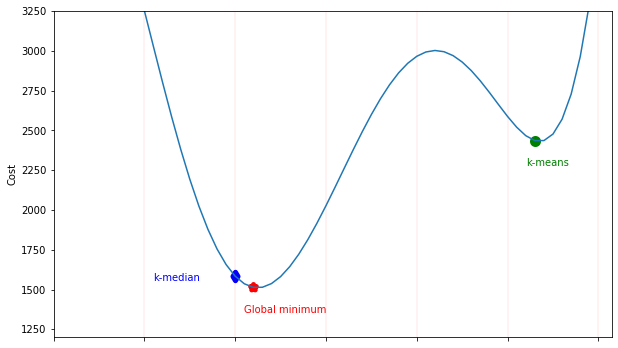

In [3]:
theoretical_lib.plot_res()